In [1]:
# **Customer Churn Rate Prediction**

## Importing Libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

### **Formatting Total Charges Column**

In [7]:
for i in range(len(list(df["tenure"]))):
    if df["tenure"][i]== 0:
        print(i)
        df["TotalCharges"][i] = "0.00"

488
753
936
1082
1340
3331
3826
4380
5218
6670
6754


In [8]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], downcast="float")

### **Converting Categorical Values into Numeric Values**

In [9]:
for col in df.columns:
    df[col].replace({'Yes':1},inplace=True)
    df[col].replace({'No':0},inplace=True)
    df[col].replace({'Female':1},inplace=True)
    df[col].replace({'Male':0},inplace=True)
    df[col].replace({'No phone service':2},inplace=True)
    df[col].replace({'No internet service':2},inplace=True)
    df[col].replace({'DSL':1},inplace=True)
    df[col].replace({'Fiber optic':2},inplace=True)
    df[col].replace({'Month-to-month':0},inplace=True)
    df[col].replace({'One year':1},inplace=True)
    df[col].replace({'Two year':2},inplace=True)
    df[col].replace({'Electronic check':0},inplace=True)
    df[col].replace({'Mailed check':1},inplace=True)
    df[col].replace({'Bank transfer (automatic)':2},inplace=True)
    df[col].replace({'Credit card (automatic)':3},inplace=True)

In [10]:
# df.head()

In [11]:
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [2 0 1]
InternetService : [1 2 0]
OnlineSecurity : [0 1 2]
OnlineBackup : [1 0 2]
DeviceProtection : [0 1 2]
TechSupport : [0 1 2]
StreamingTV : [0 1 2]
StreamingMovies : [0 1 2]
Contract : [0 1 2]
PaperlessBilling : [1 0]
PaymentMethod : [0 1 2 3]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


### **Correlation Heatmap**

<AxesSubplot:>

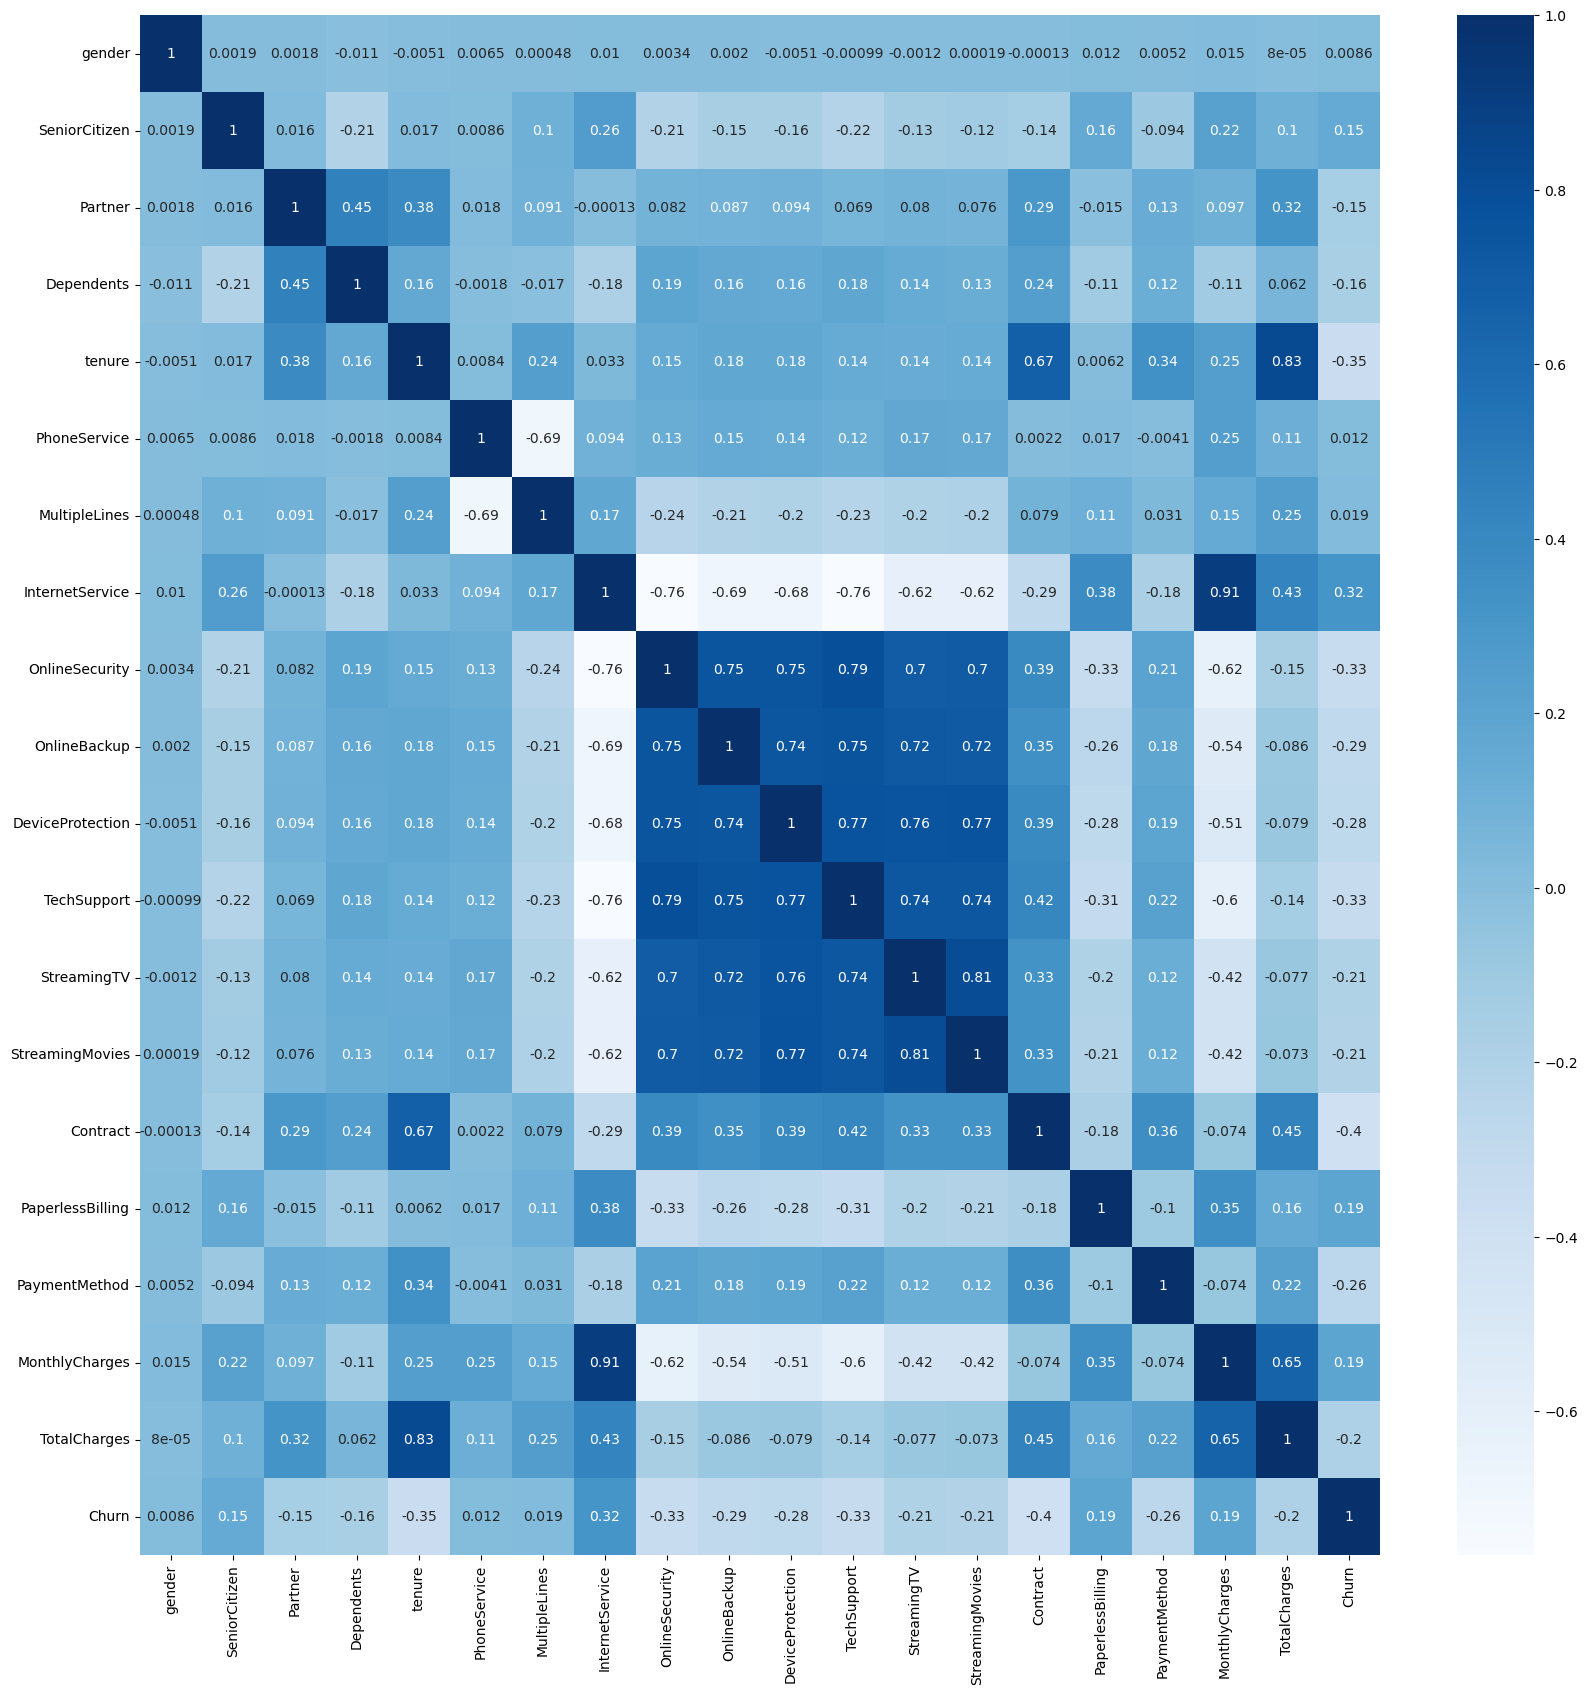

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

<AxesSubplot:>

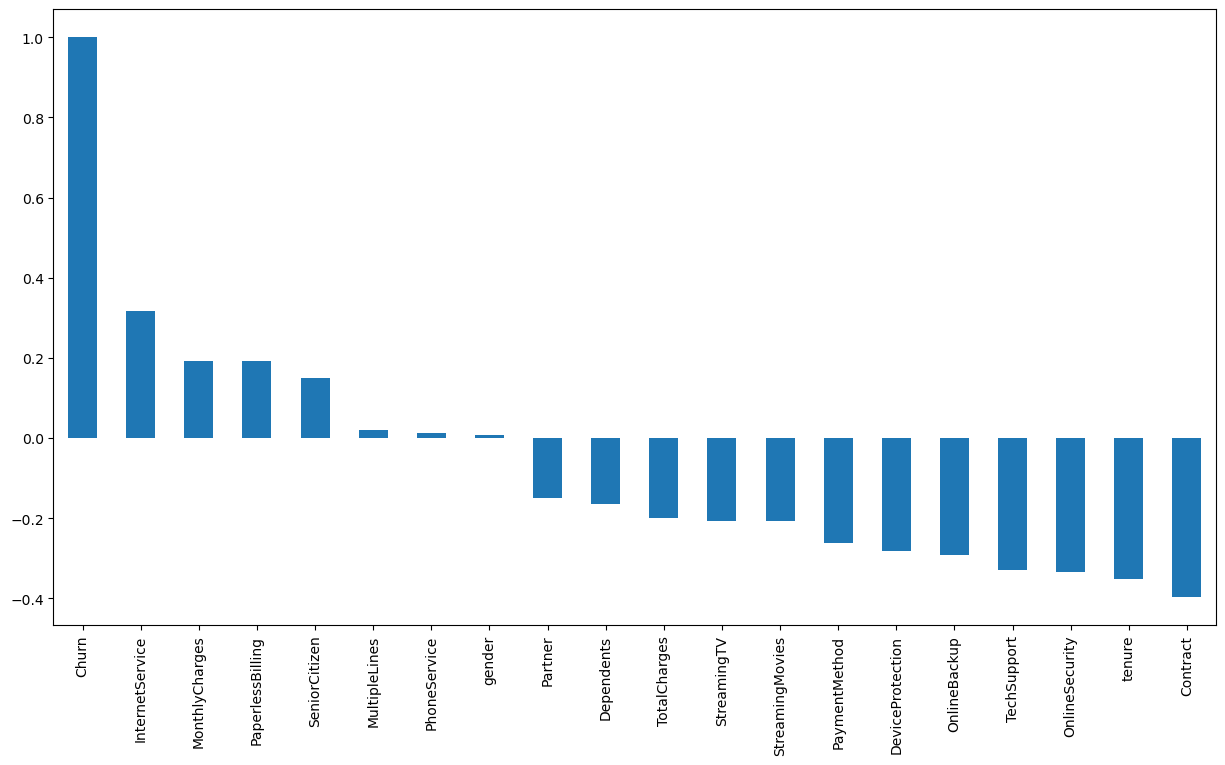

In [13]:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [14]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
unique,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,7590-VHVEG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.615505,1.222916,0.720006,...,0.777226,0.723555,0.817691,0.821241,0.690473,0.592219,1.315633,64.761692,2279.734375,0.265370
std,NaN,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.656039,0.778877,0.796885,...,0.778826,0.795896,0.763212,0.761725,0.833755,0.491457,1.148907,30.090047,2266.794434,0.441561
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.549988,0.000000
50%,NaN,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,70.350000,1394.550049,0.000000
75%,NaN,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3786.599976,1.000000


### **Dropping Irrelevant Features**

In [15]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
# df = df.drop(['gender'],axis=1)

In [17]:
# df.head()

In our case, every feature was significant enough to increase accuracy

### **Target variable insights**

In [18]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

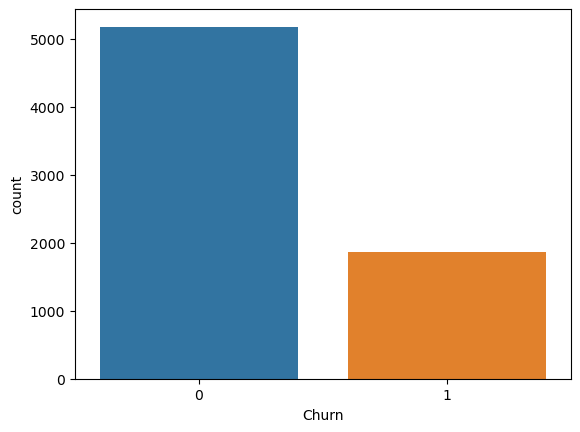

In [19]:
sns.countplot(x=df['Churn'])

Approximately 35% of the dataset consists of customers who have terminated their service

Text(0.5, 1.0, 'Distribution of total charges by churn')

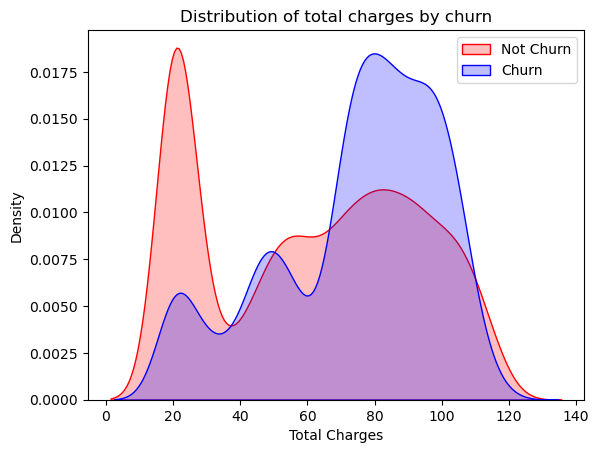

In [20]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

There is a higher churn rate when the monthly charges are high.

In [21]:
x = df.drop('Churn',axis=1)
y = df['Churn']

## Creating Training and Test Set from given Dataset

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=47)

In [24]:
customer = x_train["customerID"]
customertest = x_test["customerID"]

In [25]:
x_train = x_train.drop(['customerID'],axis=1)
x_test = x_test.drop(['customerID'],axis=1)

### **Feature Scaling**

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()

In [28]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [29]:
x_train.shape

(5634, 19)

## Neural Network

In [30]:
df_trans = df[['tenure', 'MonthlyCharges',
               'TotalCharges', 'Churn']].copy(deep=True)

for col in list(df.columns):
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'] and df[col].nunique() < 5:
        dummy_vars = pd.get_dummies(df[col])
        dummy_vars.columns = [col+ '_' + str(x) for x in dummy_vars.columns]        
        df_trans = pd.concat([df_trans, dummy_vars], axis=1)

In [31]:
# Import Packages
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Define Target Variable and Features
target = 'Churn'
features = [x for x in list(df_trans.columns) if x != target]

model = Sequential()
model.add(Dense(16, input_dim=len(features), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the Model
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

X_train, X_test, Y_train, Y_test = train_test_split(df_trans[features], 
                                                    df_trans[target], 
                                                    test_size=0.2,
                                                    random_state=18)

history = model.fit(X_train, Y_train, epochs=50, batch_size=100)

Epoch 1/50
57/57 [==============================] - 1s 3ms/step - loss: 69.8436 - accuracy: 0.7290
Epoch 2/50
57/57 [==============================] - 0s 2ms/step - loss: 2.2833 - accuracy: 0.6606
Epoch 3/50
57/57 [==============================] - 0s 2ms/step - loss: 0.6391 - accuracy: 0.7222
Epoch 4/50
57/57 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.7382
Epoch 5/50
57/57 [==============================] - 0s 3ms/step - loss: 0.4996 - accuracy: 0.7474
Epoch 6/50
57/57 [==============================] - 0s 2ms/step - loss: 0.5342 - accuracy: 0.7476
Epoch 7/50
57/57 [==============================] - 0s 2ms/step - loss: 0.5016 - accuracy: 0.7554
Epoch 8/50
57/57 [==============================] - 0s 2ms/step - loss: 0.5637 - accuracy: 0.7593
Epoch 9/50
57/57 [==============================] - 0s 2ms/step - loss: 0.5459 - accuracy: 0.7666
Epoch 10/50
57/57 [==============================] - 0s 2ms/step - loss: 0.6061 - accuracy: 0.7568
Epoch 11/50
57/57 

45/45 [==============================] - 0s 2ms/step


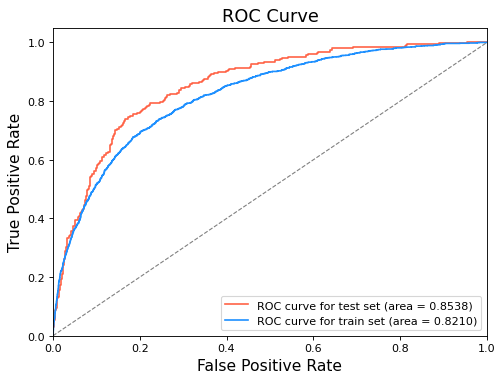

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

train_set_preds = [round(x[0]) for x in model.predict(X_train)]
test_set_preds = [round(x[0]) for x in model.predict(X_test)]

train_preds = [x[0] for x in model.predict(X_train)]
test_preds = [x[0] for x in model.predict(X_test)]

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, train_preds)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, test_preds)

train_roc_auc = auc(train_fpr, train_tpr)
test_roc_auc = auc(test_fpr, test_tpr)

# Let us visualize ROC
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(test_fpr,
         test_tpr,
         color='tomato',
         label='ROC curve for test set (area = %0.4f)' % test_roc_auc)
plt.plot(train_fpr,
         train_tpr,
         color='dodgerblue',
         label='ROC curve for train set (area = %0.4f)' % train_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right")

plt.show()

In [33]:
print("Accuracy of test set is", accuracy_score(Y_test, test_set_preds))
print("Accuracy of train set is", accuracy_score(Y_train, train_set_preds))

print("Precision of test set is", precision_score(Y_test, test_set_preds))
print("Precision of train set is", precision_score(Y_train, train_set_preds))

print("Recall of test set is", recall_score(Y_test, test_set_preds))
print("Recall of train set is", recall_score(Y_train, train_set_preds))

Accuracy of test set is 0.8211497515968772
Accuracy of train set is 0.7964146254881079
Precision of test set is 0.6761565836298933
Precision of train set is 0.6709677419354839
Recall of test set is 0.5413105413105413
Recall of train set is 0.4795783926218709


## Classification Models

### **Logistic Regression**

In [34]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
y_pred_log = log.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test,y_pred_log)

0.7885024840312278

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [38]:
precision_score(y_test, y_pred_log)

0.6389776357827476

In [39]:
recall_score(y_test, y_pred_log)

0.5194805194805194

In [40]:
f1_score(y_test,y_pred_log)

0.5730659025787964

In [41]:
customerlist = [i for i in customertest]
churnlist = []

In [42]:
for i in range(len(y_pred_log)):
    if y_pred_log[i] == 1:
        churnlist.append(customerlist[i])

In [43]:
print(churnlist)

['9167-APMXZ', '6077-BDPXA', '3496-LFSZU', '6618-RYATB', '5449-FIBXJ', '7439-DKZTW', '7801-KICAO', '1393-IMKZG', '3727-RJMEO', '3904-UKFRE', '0947-IDHRQ', '5561-NWEVX', '2865-TCHJW', '8854-CCVSQ', '9605-WGJVW', '5605-IYGFG', '1374-DMZUI', '9689-PTNPG', '3473-XIIIT', '7908-QCBCA', '4360-PNRQB', '5382-SOYZL', '4367-NHWMM', '1965-AKTSX', '2004-OCQXK', '6023-YEBUP', '8087-LGYHQ', '0506-LVNGN', '5277-ZLOOR', '2612-RANWT', '6906-ANDWJ', '4415-IJZTP', '5233-AOZUF', '1628-BIZYP', '8981-FJGLA', '9025-AOMKI', '0328-GRPMV', '3244-DCJWY', '9799-CAYJJ', '9894-EZEWG', '9565-DJPIB', '2575-GFSOE', '7240-FQLHE', '6692-YQHXC', '7470-MCQTK', '9430-FRQOC', '1024-GUALD', '9514-JDSKI', '3707-GNWHM', '6615-NGGZJ', '6630-UJZMY', '8118-TJAFG', '7943-RQCHR', '4184-TJFAN', '9885-CSMWE', '9979-RGMZT', '1508-DFXCU', '4749-OJKQU', '6457-GIRWB', '0916-QOFDP', '7495-OOKFY', '3669-LVWZB', '0612-RTZZA', '2984-AFWNC', '9658-WYUFB', '1268-ASBGA', '3744-ZRRDZ', '7018-WBJNK', '8224-DWCKX', '0231-LXVAP', '7901-TBKJX', '3871

A list of customers at risk is provided after prediction

### **SVC (Support Vector Classifier)**

In [44]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)

In [45]:
accuracy_score(y_test, y_pred_svm)

0.7863733144073811

In [46]:
precision_score(y_test, y_pred_svm)

0.6555555555555556

In [47]:
recall_score(y_test, y_pred_svm)

0.4597402597402597

In [48]:
f1_score(y_test,y_pred_svm)

0.5404580152671755

In [101]:
print(churnlist)

['9167-APMXZ', '6077-BDPXA', '3496-LFSZU', '6618-RYATB', '5449-FIBXJ', '7439-DKZTW', '7801-KICAO', '1393-IMKZG', '3727-RJMEO', '3904-UKFRE', '0947-IDHRQ', '5561-NWEVX', '2865-TCHJW', '8854-CCVSQ', '9605-WGJVW', '5605-IYGFG', '1374-DMZUI', '9689-PTNPG', '3473-XIIIT', '7908-QCBCA', '4360-PNRQB', '5382-SOYZL', '4367-NHWMM', '1965-AKTSX', '2004-OCQXK', '6023-YEBUP', '8087-LGYHQ', '0506-LVNGN', '5277-ZLOOR', '2612-RANWT', '6906-ANDWJ', '4415-IJZTP', '5233-AOZUF', '1628-BIZYP', '8981-FJGLA', '9025-AOMKI', '0328-GRPMV', '3244-DCJWY', '9799-CAYJJ', '9894-EZEWG', '9565-DJPIB', '2575-GFSOE', '7240-FQLHE', '6692-YQHXC', '7470-MCQTK', '9430-FRQOC', '1024-GUALD', '9514-JDSKI', '3707-GNWHM', '6615-NGGZJ', '6630-UJZMY', '8118-TJAFG', '7943-RQCHR', '4184-TJFAN', '9885-CSMWE', '9979-RGMZT', '1508-DFXCU', '4749-OJKQU', '6457-GIRWB', '0916-QOFDP', '7495-OOKFY', '3669-LVWZB', '0612-RTZZA', '2984-AFWNC', '9658-WYUFB', '1268-ASBGA', '3744-ZRRDZ', '7018-WBJNK', '8224-DWCKX', '0231-LXVAP', '7901-TBKJX', '3871

### **K Nearest Neighbors Classifier**

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

In [50]:
accuracy_score(y_test, y_pred_knn)

0.7494677075940384

In [51]:
precision_score(y_test, y_pred_knn)

0.5454545454545454

In [52]:
recall_score(y_test, y_pred_knn)

0.4987012987012987

In [53]:
f1_score(y_test,y_pred_knn)

0.5210312075983717

### **Decision Tree Classifier**

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

In [55]:
accuracy_score(y_test, y_pred_dt)

0.7267565649396736

In [56]:
precision_score(y_test, y_pred_dt)

0.5

In [57]:
recall_score(y_test, y_pred_dt)

0.5038961038961038

In [58]:
f1_score(y_test,y_pred_dt)

0.5019404915912031

### **Random Forest Classifier**

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

In [60]:
accuracy_score(y_test,y_pred_rf)

0.7792760823278921

In [61]:
precision_score(y_test, y_pred_rf)

0.6284722222222222

In [62]:
recall_score(y_test, y_pred_rf)

0.4701298701298701

In [63]:
f1_score(y_test,y_pred_rf)

0.537890044576523

### **Gradient Boosting Classifier**

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred_gbc = gbc.predict(x_test)

In [65]:
accuracy_score(y_test,y_pred_gbc)

0.7934705464868701

In [66]:
precision_score(y_test,y_pred_gbc)

0.6620689655172414

In [67]:
recall_score(y_test,y_pred_gbc)

0.4987012987012987

In [68]:
f1_score(y_test,y_pred_gbc)

0.568888888888889

### **XGBoost**

In [69]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, verbosity = 0)
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [70]:
y_pred_xgb = model_xgb.predict(x_test)

In [71]:
accuracy_score(y_test,y_pred_xgb)

0.7757274662881476

In [72]:
precision_score(y_test,y_pred_xgb)

0.610223642172524

In [73]:
recall_score(y_test,y_pred_xgb)

0.4961038961038961

In [74]:
f1_score(y_test,y_pred_xgb)

0.5472779369627507

### **Naive Bayes**

In [75]:
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(x_train, y_train)
y_pred_gnb = model_gnb.predict(x_test)

In [76]:
accuracy_score(y_test,y_pred_gnb)

0.709013484740951

In [77]:
precision_score(y_test,y_pred_gnb)

0.4806800618238022

In [78]:
recall_score(y_test,y_pred_gnb)

0.8077922077922078

In [79]:
f1_score(y_test,y_pred_gnb)

0.6027131782945736

### **Bagging Classifier**

In [80]:
from sklearn.ensemble import BaggingClassifier
model_bgc = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bgc.fit(x_train, y_train)
y_pred_bgc = model_bgc.predict(x_test)

In [81]:
accuracy_score(y_test, y_pred_bgc)

0.772888573456352

In [82]:
precision_score(y_test, y_pred_bgc)

0.6254826254826255

In [83]:
recall_score(y_test, y_pred_bgc)

0.42077922077922075

In [84]:
f1_score(y_test, y_pred_bgc)

0.5031055900621118

In [102]:
print(churnlist)

['9167-APMXZ', '6077-BDPXA', '3496-LFSZU', '6618-RYATB', '5449-FIBXJ', '7439-DKZTW', '7801-KICAO', '1393-IMKZG', '3727-RJMEO', '3904-UKFRE', '0947-IDHRQ', '5561-NWEVX', '2865-TCHJW', '8854-CCVSQ', '9605-WGJVW', '5605-IYGFG', '1374-DMZUI', '9689-PTNPG', '3473-XIIIT', '7908-QCBCA', '4360-PNRQB', '5382-SOYZL', '4367-NHWMM', '1965-AKTSX', '2004-OCQXK', '6023-YEBUP', '8087-LGYHQ', '0506-LVNGN', '5277-ZLOOR', '2612-RANWT', '6906-ANDWJ', '4415-IJZTP', '5233-AOZUF', '1628-BIZYP', '8981-FJGLA', '9025-AOMKI', '0328-GRPMV', '3244-DCJWY', '9799-CAYJJ', '9894-EZEWG', '9565-DJPIB', '2575-GFSOE', '7240-FQLHE', '6692-YQHXC', '7470-MCQTK', '9430-FRQOC', '1024-GUALD', '9514-JDSKI', '3707-GNWHM', '6615-NGGZJ', '6630-UJZMY', '8118-TJAFG', '7943-RQCHR', '4184-TJFAN', '9885-CSMWE', '9979-RGMZT', '1508-DFXCU', '4749-OJKQU', '6457-GIRWB', '0916-QOFDP', '7495-OOKFY', '3669-LVWZB', '0612-RTZZA', '2984-AFWNC', '9658-WYUFB', '1268-ASBGA', '3744-ZRRDZ', '7018-WBJNK', '8224-DWCKX', '0231-LXVAP', '7901-TBKJX', '3871

## Accuracy Summary

In [85]:
performance_summary = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF','GBC','XGB', 'GNB', 'BGC'],
    'ACC':[accuracy_score(y_test,y_pred_log),
           accuracy_score(y_test,y_pred_svm),
           accuracy_score(y_test,y_pred_knn),
           accuracy_score(y_test,y_pred_dt),
           accuracy_score(y_test,y_pred_rf),
           accuracy_score(y_test,y_pred_gbc),
           accuracy_score(y_test,y_pred_xgb),
           accuracy_score(y_test,y_pred_gnb),
           accuracy_score(y_test,y_pred_bgc)
          ]
})

In [86]:
performance_summary

,Model,ACC
0,LR,0.788502
1,SVC,0.786373
2,KNN,0.749468
3,DT,0.726757
4,RF,0.779276
5,GBC,0.793471
6,XGB,0.775727
7,GNB,0.709013
8,BGC,0.772889


<AxesSubplot:xlabel='Model', ylabel='ACC'>

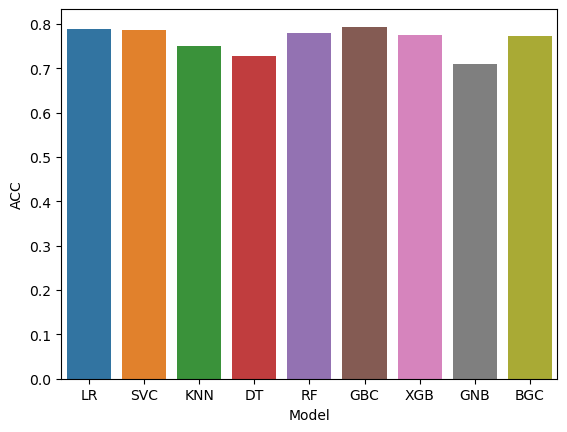

In [87]:
sns.barplot(data = performance_summary,x = 'Model',y = 'ACC')

As we can see, Gradient Boost Classifier has highest accuracy among the ML models

## Precision Summary

In [88]:
performance_summary = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF','GBC','XGB', 'GNB', 'BGC'],
    'PRE':[precision_score(y_test,y_pred_log),
           precision_score(y_test,y_pred_svm),
           precision_score(y_test,y_pred_knn),
           precision_score(y_test,y_pred_dt),
           precision_score(y_test,y_pred_rf),
           precision_score(y_test,y_pred_gbc),
           precision_score(y_test,y_pred_xgb),
           precision_score(y_test,y_pred_gnb),
           precision_score(y_test,y_pred_bgc)
          ]
})

In [89]:
performance_summary

,Model,PRE
0,LR,0.638978
1,SVC,0.655556
2,KNN,0.545455
3,DT,0.500000
4,RF,0.628472
5,GBC,0.662069
6,XGB,0.610224
7,GNB,0.480680
8,BGC,0.625483


<AxesSubplot:xlabel='Model', ylabel='PRE'>

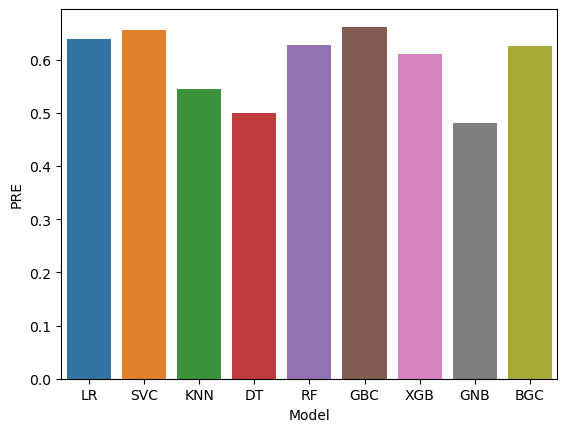

In [90]:
sns.barplot(data = performance_summary,x = 'Model',y = 'PRE')

## Voting Classifier

In [91]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[('rf', rf), ('gnb', gbc), ('xgb', model_xgb),('lr', log), ('dt', dt), ('svm', svm)], voting='hard')

ensemble.fit(x_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('gnb', GradientBoostingClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=0,
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_type...
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            ma

In [92]:
y_pred_vote = ensemble.predict(x_test)

In [93]:
accuracy_score(y_test,y_pred_vote)

0.794180269694819

### **Using Scores as Weights**

In [94]:
def get_models():
    models = list()
    models.append(('lr', LogisticRegression()))
    models.append(('bgc', BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)))
    models.append(('gbc', GradientBoostingClassifier()))
    print(models)
    return models

In [95]:
def evaluate_models(models, x_train, x_test, y_train, y_test):
    scores = list()
    i = 0
    for name, model in models:
        model.fit(x_train, y_train)
        y_pred_wgt = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred_wgt)
        scores.append(acc)
    return scores

In [96]:
models = get_models()
scores = evaluate_models(models, x_train, x_test, y_train, y_test)
print(scores)
ensemble = VotingClassifier(estimators=models, voting='soft', weights = scores)
ensemble.fit(x_train, y_train)
y_pred_votew = ensemble.predict(x_test)
score = accuracy_score(y_test, y_pred_votew)
print(F"Weighted Avg Accuracy: {score}")

[('lr', LogisticRegression()), ('bgc', BaggingClassifier(base_estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5)), ('gbc', GradientBoostingClassifier())]
[0.7885024840312278, 0.7806955287437899, 0.7934705464868701]
Weighted Avg Accuracy: 0.7863733144073811


## Top 3 Comparision

In [97]:
performance_summary = pd.DataFrame({
    'Model':['NN', 'GBC', 'VOTE'],
    'ACC':[accuracy_score(Y_test, test_set_preds),
           accuracy_score(y_test,y_pred_gbc),
           accuracy_score(y_test,y_pred_vote)
          ]
})

In [98]:
performance_summary

,Model,ACC
0,NN,0.821150
1,GBC,0.793471
2,VOTE,0.794180


<AxesSubplot:xlabel='Model', ylabel='ACC'>

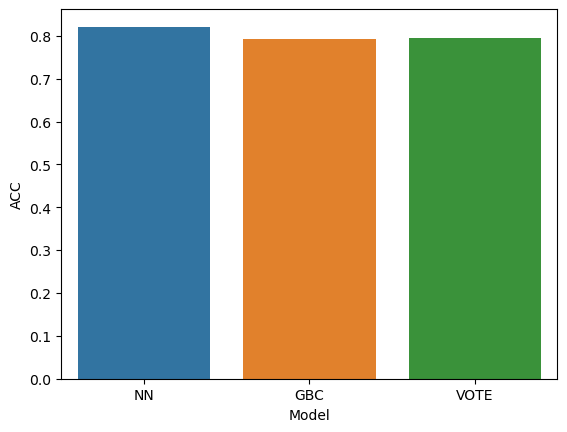

In [99]:
sns.barplot(data = performance_summary,x = 'Model',y = 'ACC')

Our best model is the Neural Network Model with an accuracy of 81.8%